In [334]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
from keras.preprocessing import image

In [335]:
p = Path("./datasets/poke_images_svm_train")

dirs = p.glob("*")


# Prepare data

In [336]:
y = pd.read_csv("./datasets/svm_pokemon_train.csv")
label_dict={}
label_map={'Pikachu':0,'Bulbasaur':1,'Charmander':2 }
label_to_pokemon= {0:'Pikachu', 1:'Bulbasaur', 2:'Charmander'}
for i in range(y.shape[0]): # storing the image name to the pokemon name in the dictionary
    label_dict[y.loc[i][0]]= label_map[y.loc[i][1]] 



In [337]:
img_data=[]
labels= []
for folder_name in dirs:
    #print(folder_name)
    label= str(folder_name).split("\\")[-1]
    label= label_dict[label]
    labels.append(label)
    img = image.load_img(folder_name, target_size= (100,100))
    img_array= image.img_to_array(img)
    img_data.append(img_array)

C:\Users\vindyanchal\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [338]:
print(labels)
print(img_data)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[array([[[145., 190., 232.],
        [145., 190., 231.],
        [146., 191., 232.],
  

# Randomly shuffle our data

In [339]:
import random

#zip our data so img_data and corresponding data are not mixed
combined= list(zip(img_data, labels))

#randomly shuffle the data
random.shuffle(combined)

#unzip our data
img_data, labels = zip(*combined)

labels= np.array(labels)
img_data= np.array(img_data)


# Visualize our data

In [306]:
import matplotlib.pyplot as plt
def drawimg(im):
    img= im/ 255.0
    plt.imshow(img)
    plt.axis("off")
    plt.show()

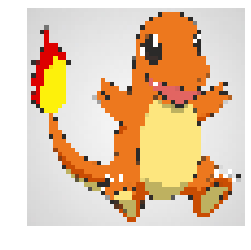

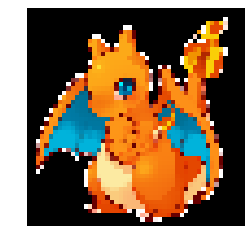

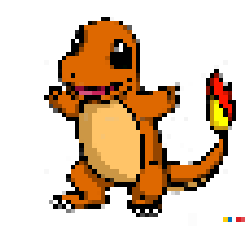

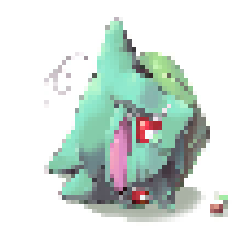

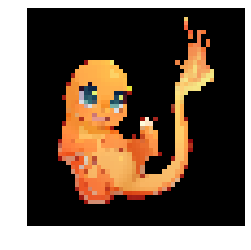

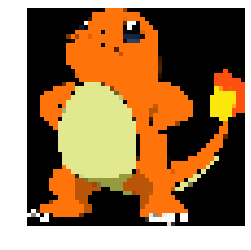

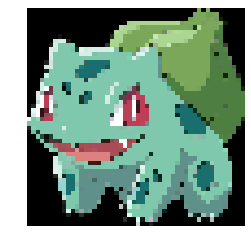

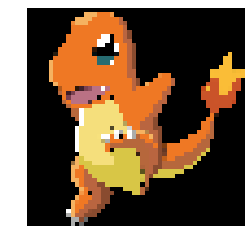

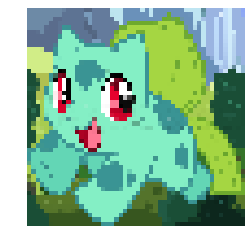

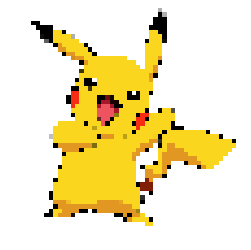

In [307]:
for i in range(10):
    drawimg(img_data[i])

# SVM classifier copied from the other  file(manual implementation)

In [308]:
class SVM:
    def __init__(self, C= 1.0):
        self.W= 0 
        self.C= C 
        self.b= 0 
    def HingeLoss(self, X,Y,W, b):
        loss= 0.0
        loss+= 0.5*(np.dot(W,W.T))
        
        for i in range(X.shape[0]):
            ti= Y[i]*(np.dot(W,X[i].T) +b)
            loss+= self.C *max(0, 1-ti)
        
        return loss[0][0]
    def fit(self, X, Y, maxitr= 300, batch_size= 100, learning_rate=0.001):
        
        no_of_features=X.shape[1]
        no_of_examples= X.shape[0]
        
        # initializing the model parametres
        w= np.zeros((1,no_of_features))
        b= 0;
        c = self.C
        n= learning_rate
        #print(self.HingeLoss(X,Y,w,b))
        losses= []
    
        for i in range(maxitr):
            
        
            loss= self.HingeLoss(X, Y, w, b)
            losses.append(loss)
            ids= np.arange(no_of_examples)
            np.random.shuffle(ids)
            for batch_start in range(0, no_of_examples, batch_size ):
                
                gradw=0
                gradb=0
                
                for j in range(batch_start, batch_start+ batch_size):
                    if(j<no_of_examples):
                        ind= ids[j]
                        ti= Y[ind]*(np.dot(w, X[ind].T) +b)
                        # Computing the gradients
                        if(ti>=1): # do nothing
                            gradw+= 0 
                            gradb+=0 
                        else :
                            gradw+= c*Y[ind]*X[ind]
                            gradb+= c*Y[ind]
                w= w -n*w +n*gradw
                b= b + n*gradb
                
        self.W= w
        self.b= b
        return w, b, losses
            

# Converting data for one vs one scheme

In [340]:
img_data= img_data.reshape((img_data.shape[0], -1))
print(img_data.shape)
print(labels.shape)

(304, 30000)
(304,)


In [310]:
Classes= len(np.unique(labels))
print(Classes)

3


In [311]:
def classwise_data(X, Y):
    data={}
    
    for j in range(Classes):
        data[j]=[]
    for i in range(labels.shape[0]):  
        data[Y[i]].append(X[i])
    for j in data.keys():
        data[j]= np.array(data[j])
    return data
        

In [312]:
data = classwise_data(img_data, labels)
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)

(101, 7500)
(101, 7500)
(102, 7500)


In [313]:
def combine_data_svm(x1, x2):
    l1, l2 = x1.shape[0], x2.shape[0]
    samples = l1+l2
    features= x1.shape[1]
    
    comb_data= np.zeros((samples, features))
    comb_data[:l1, :]= x1
    comb_data[l1:,:]= x2
    
    comb_label= np.zeros((samples, ))
    comb_label[:l1]= -1
    comb_label[l1:]= 1
    
    return comb_data, comb_label

    

# Training nC2 svms for one vs one scheme

In [314]:
my_svm= SVM()


def Train_svm( ):
    svm_classifier = {}
    for i in range(Classes):
        svm_classifier[i]= {}
        for j in range(i+1, Classes):
            Xtrain , Ytrain = combine_data_svm(data[i], data[j])
            wts, bias, loss=my_svm.fit(Xtrain, Ytrain)
            svm_classifier[i][j]= (wts, bias)
    return svm_classifier

            

In [315]:
svm_classifier = Train_svm()
print(svm_classifier[0][1][0].shape)

(1, 7500)


# Predict using our model

In [316]:
def binary_pred(x, w, b):
    val= np.dot(w , x.T)+b
    if(val>=0 ):
        return 1
    else :
        return -1
def predict(x):
    scores= np.zeros((Classes, ))
    for i in range(Classes):
        for j in range(i+1, Classes):
            w,b = svm_classifier[i][j]
            z= binary_pred(x, w, b)
            if(z==1):
                scores[j]+=1
            else :
                scores[i]+=1
   # print(scores)
    return np.argmax(scores)

In [317]:
print(predict(img_data[0]))
print(labels[0])

2
2


In [318]:
count= 0
for i in range(img_data.shape[0]):
    
    prediction = predict(img_data[i])
    if(prediction==labels[i]):
        count+=1
print ((count/img_data.shape[0])*100)

100.0


# Using it on the Testing data

In [344]:
P = Path("./datasets/poke_images_svm_test")

dirs = P.glob("*")

y1 = pd.read_csv("./datasets/svm_pokemon_test.csv")

image_pred_dict = {}

img_test= []
pic_name= []
for folder_name in dirs:
    #print(folder_name)
    label= str(folder_name).split("\\")[-1]
    pic_name.append(label)
    img = image.load_img(folder_name, target_size= (100,100))
    img_array= image.img_to_array(img)
    img_test.append(img_array)


In [321]:
print(len(img_test))
print(len(pic_name))

123
123


In [345]:
img_test=np.array(img_test)
img_test=img_test.reshape((img_test.shape[0], -1))
pic_name= np.array(pic_name)
print(img_test.shape, pic_name.shape)

(123, 30000) (123,)


In [323]:
for i in range(img_test.shape[0]):
    prediction= predict(img_test[i])
    image_pred_dict[pic_name[i]]= label_to_pokemon[prediction]

In [324]:
result = []
for i in range(y1.shape[0]):
    result.append( [y1.loc[i][0], image_pred_dict[y1.loc[i][0]]])
result = pd.DataFrame(result)
result.head()


,0,1
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu


In [325]:
result.columns= ["ImageId", "NameOfPokemon"]
result.head()

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu


In [326]:
result.to_csv("./datasets/pokemon_result.csv", header= True, index= False)# 97% accuracy

# Predict using svm from sklearn

In [341]:
from sklearn import svm 


In [342]:
svc = svm.SVC(kernel = "linear", )
svc.fit(img_data, labels)
svc.score(img_data, labels)

1.0

In [347]:
predi=svc.predict(img_test)
print(predi)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2]


In [355]:
for i in range(predi.shape[0]):
    predi[i]= predi[i]
    image_pred_dict[pic_name[i]]= label_to_pokemon[predi[i]]
    

In [356]:
result = []
for i in range(y1.shape[0]):
    result.append( [y1.loc[i][0], image_pred_dict[y1.loc[i][0]]])
result = pd.DataFrame(result)
result.head()


,0,1
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu


In [357]:
result.columns= ["ImageId", "NameOfPokemon"]
result.head()
result.to_csv("./datasets/pokemon_result.csv", header= True, index= False)# 95% accuracy